In [1]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 71.1 MB/s eta 0:00:00


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /usr/local/lib/python3.11/dist-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/afe10a9e9ad145909bc9c54190531b9d-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/afe10a9e9ad145909bc9c54190531b9d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 7.9999998 (2)
0  Obj -0 Dual inf 7.9999998 (2)
2  Obj 135
Optimal - objective value 135
Optimal objective 135 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Status: Optimal
Optimal value of x: 20.0
Optimal value of y: 15.0
Opt

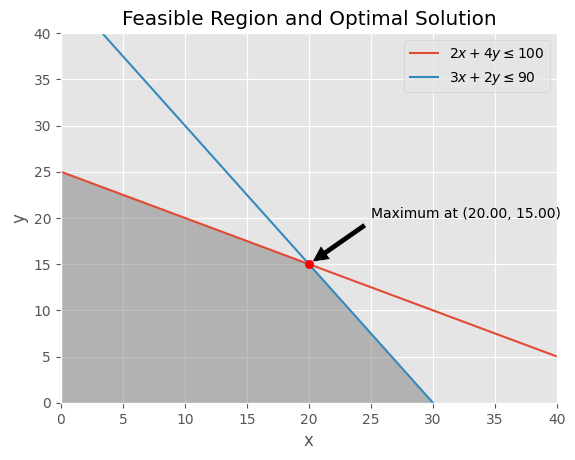

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

# Define the problem
prob = LpProblem("simple_problem", LpMaximize)

# Define the variables
x = LpVariable("x", lowBound=0)
y = LpVariable("y", lowBound=0)

# Objective function
prob += 3 * x + 5 * y, "Objective"

# Constraints
prob += 2 * x + 4 * y <= 100, "Constraint1"
prob += 3 * x + 2 * y <= 90, "Constraint2"

# Solve the problem
status = prob.solve()

# Print the results
print(f"Status: {LpStatus[status]}")
print(f"Optimal value of x: {x.varValue}")
print(f"Optimal value of y: {y.varValue}")
print(f"Optimal objective value: {prob.objective.value()}")

# Plotting the constraints
x_vals = np.linspace(0, 40, 1000)

# Constraint 1: 2x + 4y <= 100
y1_vals = (100 - 2 * x_vals) / 4

# Constraint 2: 3x + 2y <= 90
y2_vals = (90 - 3 * x_vals) / 2

# Plotting
plt.plot(x_vals, y1_vals, label=r'$2x + 4y \leq 100$')
plt.plot(x_vals, y2_vals, label=r'$3x + 2y \leq 90$')
plt.xlim((0, 40))
plt.ylim((0, 40))
plt.xlabel('x')
plt.ylabel('y')

# Fill the feasible region
y_min = np.minimum(y1_vals, y2_vals)
plt.fill_between(x_vals, y_min, where=(y_min >= 0), color='grey', alpha=0.5)

# Plot the optimal point
plt.scatter(x.varValue, y.varValue, color='red', zorder=5)
plt.annotate(f'Maximum at ({x.varValue:.2f}, {y.varValue:.2f})',
             xy=(x.varValue, y.varValue), xytext=(x.varValue + 5, y.varValue + 5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend()
plt.title('Feasible Region and Optimal Solution')
plt.grid(True)
plt.show()
